In [160]:
# IMPORTS
import os
import requests
import json
from requests.auth import AuthBase
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import plotly.plotly as py
import plotly.graph_objs as go
import datetime

import plotly 
plotly.tools.set_credentials_file(username='cadex', api_key='szqxccp2tp')

%matplotlib inline  

In [161]:
filename = ("/users/obenhuber/Desktop/OECD Data Forecasts.csv")

data = pd.read_csv(filename,parse_dates=False,skiprows=1,names = ['Location','Country','VariableCode','VariableName','Frequency','FrequencyName','TimeCode','Time','UnitCode','Unit','PowerCodeCode','PowerCode','ReferencePeriodCode','ReferenceCode','Value','FlagCodes','Flags'])
data['Time'] = pd.to_datetime(data['Time'], format= '%Y')
data = data.set_index('Time','Location')

data.index = data.index.to_period('A').to_timestamp('A')

#print(df)


In [162]:
# Get a list of all countries/indicators in database (Name and ISO Code)

country_list = data.Country.unique()
#print(country_list)

indicator_list = data.VariableName.unique()
#print(indicator_list)

indicator_code_list = data.VariableCode.unique()
#print(indicator_code_list)

#for i in country_list:
#    print(i)


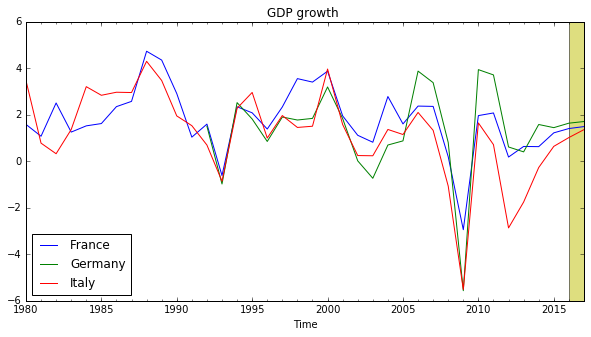

In [172]:
ticker = 'GDPV_ANNPCT'
country = ['France','Germany','Italy']

temp = data.loc[(data['VariableCode'] == ticker), list(['VariableName','VariableCode'])]
indicator = (temp.VariableName.iloc[0])

n_countries = len(country)

df_selection = pd.DataFrame()

labels = []

for element in range(n_countries):
    df_temp = data.loc[(data['Country'] == country[element]) & (data['VariableName'] == indicator), list(['Value'])]
    ax = df_temp['Value'].plot(kind='line', figsize=(10,5), label=str(country[element]),title=indicator)

#ax.legend([labels], loc='best', frameon=False)
ax.legend(loc='best')
ax.axvspan(datetime.date(2016, 12, 31), datetime.date(2020, 12, 31),facecolor='y', alpha=0.5)


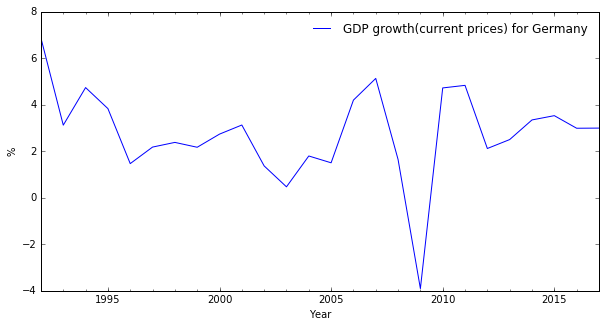

In [164]:
# Extract Export growth (XGSV_ANNPCT)

#data.groupby('VariableName').describe()

#indicator = 'Export performance for total goods and services growth'
ticker = 'GDP_ANNPCT'
country = 'Germany'

temp = data.loc[(data['VariableCode'] == ticker), list(['VariableName','VariableCode'])]
indicator = (temp.VariableName.iloc[0])


selection = data.loc[(data['Country'] == country) & (data['VariableName'] == indicator), list(['Value'])]
#print(selection)

#selection = selection.set_index(['Time'])
selection.column = [indicator]

ax = selection['Value'].plot(kind='line', figsize=(10,5), color='blue')
ax.set_ylabel("%")
ax.set_xlabel("Year")
label = indicator + " for " + country

ax.legend([label], loc='best', frameon=False)

now = datetime.datetime.now()
#ax.axvspan(now.year-1, selection.index.max(), facecolor='y', alpha=0.5)
